Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Data pre-processing and cleaning

In [3]:
df=pd.read_csv('IRIS.csv')

In [4]:
df.head()

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [5]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
df.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

From all species we remove the Iris word

In [9]:
df.species=df.species.map(lambda x:x.split('-')[1])

In [10]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

#### Conclusion : Data is already clean 

# EDA

Text(0.5, 1.0, 'Sepal\nLength VS. Width')

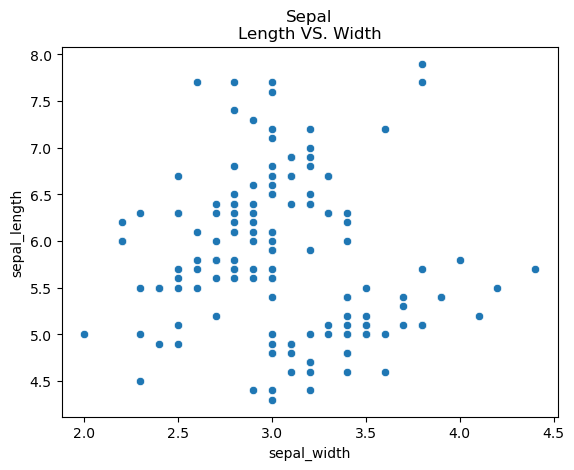

In [11]:
sns.scatterplot(data=df,x='sepal_width',y='sepal_length');
plt.title("Sepal\nLength VS. Width")

From above Fig
- we can say that, data is not linear 
- but there is some different in data,
- That is we can form cluster

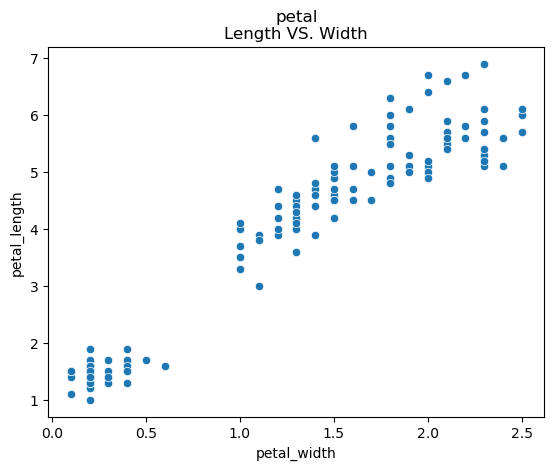

In [12]:
sns.scatterplot(data=df,x='petal_width',y='petal_length');
plt.title("petal\nLength VS. Width");

From above Fig
- The realtion is linear
- cluster is forming

Text(0.5, 1.0, 'Count VS. Types of flowers')

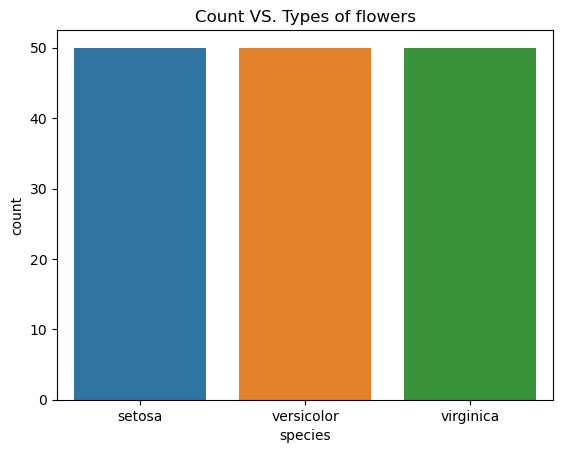

In [13]:
sns.countplot(data=df,x='species');
plt.title("Count VS. Types of flowers")

From above Fig
- There are total 3 types of flowers in dataset
- The count of each flower is almost same
- Each flower is approximately count is 50

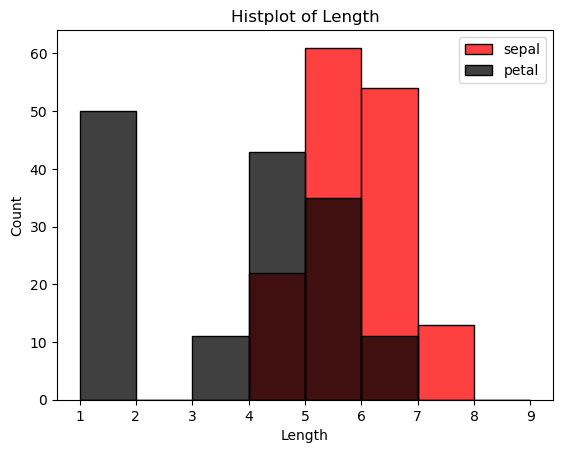

In [14]:
sns.histplot(data=df,x='sepal_length',color='red',label='sepal',bins=range(1,10))
sns.histplot(data=df,x='petal_length',color='black',label='petal',bins=range(1,10))
plt.xlabel("Length")
plt.title('Histplot of Length')
plt.legend()
plt.show()

From above Fig
- petal of length 1-2 is high in qty
- Sepal in 5-6 length is high in qty
- min length is 1 and max length is 8


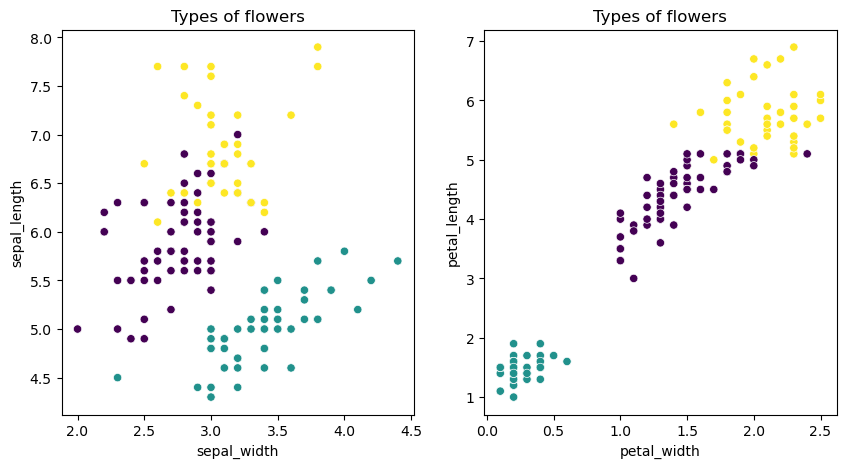

In [15]:
from sklearn.cluster import KMeans
cluster=KMeans(n_clusters=3)
label=cluster.fit_predict(df.drop('species',axis=1))


plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('Types of flowers')
sns.scatterplot(data=df,x='sepal_width',y='sepal_length',c=label,)

plt.subplot(1,2,2)
plt.title('Types of flowers')
sns.scatterplot(data=df,x='petal_width',y='petal_length',c=label,)

plt.show()

From above Fig
- We are forming only 3 cluster, because we have 3 types of flowes
- cluster of flowers is formed


# Feature Engineering

In [16]:
class_name=df.species.unique()
class_name

array(['setosa', 'versicolor', 'virginica'], dtype=object)

## Encoding

In [17]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [18]:
df['species']=df.species.replace({
    'setosa':0,
    'versicolor':1,
    'virginica':2,
})

### Selection

In [19]:
inputs=df.drop('species',axis=1)
target=df.species

##  Scaling

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler=MinMaxScaler()
scaler.fit(inputs)

MinMaxScaler()

In [22]:
cols=inputs.columns
cols

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [23]:
inputs[cols]=scaler.transform(inputs[cols])

## Split Data

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(inputs,target,test_size=0.2,random_state=42)

# Model Building

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
y_train.shape

(120,)

In [27]:
y_test.shape

(30,)

In [28]:
log=LogisticRegression()
log.fit(X_train,y_train)
log.score(X_test,y_test)

0.9666666666666667

# Model Evaluation

In [29]:
def eval_model(**param):
    log=LogisticRegression(**param,n_jobs=-1)
    log.fit(X_train,y_train)
    train_acc=log.score(X_train,y_train)
    val_acc=log.score(X_test,y_test)
    return train_acc,val_acc
    

In [30]:
def plot_eval(x_axis,train_list,val_list):
    plt.title("Evalutation")
    plt.plot(x_axis,train_list,label='Train')
    plt.plot(x_axis,val_list,label='Validation')
    plt.xticks(x_axis)
    plt.ylabel("Accuracy")
    plt.legend()
    return plt.show()

In [31]:
eval_model(intercept_scaling=1)

(0.925, 0.9666666666666667)

## intercept_scaling

In [32]:
intercept_scaling_list =[float(i) for i in range(1,12)]
train_acc=[]
val_acc=[]
for arg in intercept_scaling_list:
    t,v=eval_model(intercept_scaling=arg)
    train_acc.append(t)
    val_acc.append(v)
    

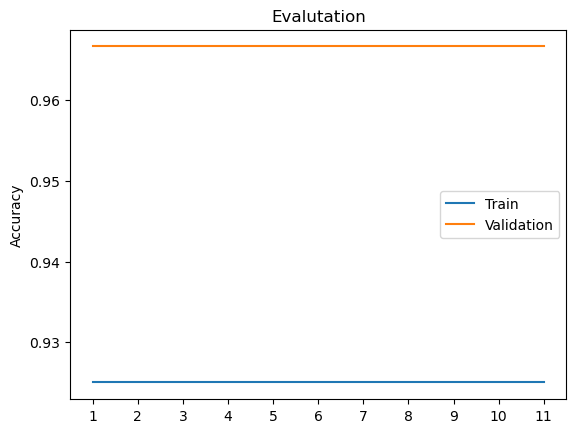

In [33]:
plot_eval(intercept_scaling_list,train_acc,val_acc)

##### intercept_scaling is not affecting 

## max_iter

In [34]:
max_iter_list =[100,150,200,250,300,350,400,450,500]
train_acc=[]
val_acc=[]
for arg in max_iter_list:
    t,v=eval_model(max_iter=arg)
    train_acc.append(t)
    val_acc.append(v)
    

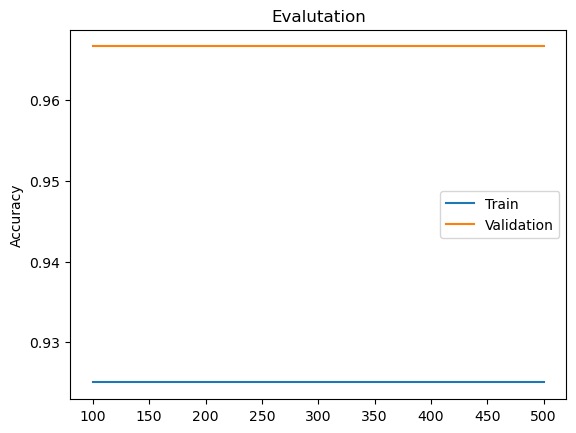

In [35]:
plot_eval(max_iter_list,train_acc,val_acc)

#####  max_itr is not affecting

# Final model

In [36]:
log=LogisticRegression(max_iter=300,intercept_scaling=1,)

In [37]:
log.fit(inputs,target)

LogisticRegression(max_iter=300)

Our final model is ready

# Model Save

In [38]:
import joblib

In [39]:
joblib.dump(log,'logistic_model')

['logistic_model']

Model is Saved